In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_market_data = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", 
                                                                      "price_change_percentage_7d", "price_change_percentage_14d",
                                                                      "price_change_percentage_30d", "price_change_percentage_60d",
                                                                      "price_change_percentage_200d", "price_change_percentage_1y"]])

In [6]:
# Create a DataFrame with the scaled data
scaled_market_data= pd.DataFrame(
    scaled_market_data, 
    columns = ["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d",
              "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d",
              "price_change_percentage_1y"]
)

# Copy the crypto names from the original DataFrame
scaled_market_data["coin_id"] =df_market_data.index

# Set the coin_id column as index
scaled_market_data = scaled_market_data.set_index("coin_id")

# Display the scaled DataFrame
scaled_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [8]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    kmodel = KMeans(n_clusters = i, random_state = 1)
    kmodel.fit(scaled_market_data)
    inertia.append(kmodel.inertia_)

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, 
             "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051


In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df.hvplot.line(
    x= "k", 
    y = "inertia",
    title = "Elbow Curve", 
    xticks = k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the elbow curve graphic, k=4 is the best value

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [11]:
# Initialize the K-Means model using the best value for k
kmodel_4 = KMeans(n_clusters = 4, random_state= 1)

In [12]:
# Fit the K-Means model using the scaled DataFrame
kmodel_4.fit(scaled_market_data)

KMeans(n_clusters=4, random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
k_4 = kmodel_4.predict(scaled_market_data)

# Print the resulting array of cluster values.
print(k_4)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [14]:
# Create a copy of the scaled DataFrame
scaled_market_data_predictions = scaled_market_data.copy()

In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_market_data_predictions["market_clusters"] = k_4

# Display the copy of the scaled DataFrame
scaled_market_data_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,market_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [16]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scaled_market_data_predictions.hvplot.scatter(
    x = "price_change_percentage_24h", 
    y = "price_change_percentage_7d", 
    by = "market_clusters"
)

:NdOverlay   [market_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_df = pca.fit_transform(scaled_market_data_predictions)

# View the scaled PCA data
pca_df[0:5]

array([[ 0.44890795,  1.24537573,  0.8506404 ],
       [ 0.49536709,  0.899823  ,  1.31755943],
       [-0.81884571, -0.07189909, -0.69501507],
       [-0.84035711, -0.08005407, -0.54435952],
       [ 0.81324004,  2.66952035,  1.64332113]])

In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.34871677, 0.31363391, 0.22627118])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is: 88.85

In [20]:
# Create a new DataFrame with the PCA data.
market_pca = pd.DataFrame(
    pca_df, 
    columns = ["PCA_1", "PCA_2", "PCA_3"]
)

# Copy the crypto names from the original scaled DataFrame
market_pca["coin_id"] = df_market_data.index

# Set the coin_id column as index
market_pca = market_pca.set_index("coin_id")

# Display the scaled PCA DataFrame
market_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,0.448908,1.245376,0.850640
ethereum,0.495367,0.899823,1.317559
tether,-0.818846,-0.071899,-0.695015
ripple,-0.840357,-0.080054,-0.544360
bitcoin-cash,0.813240,2.669520,1.643321


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [21]:
# Create a list with the number of k-values from 1 to 11
k2 = list(range(1,11))

In [22]:
# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k2 :
    kmodel_2 = KMeans(n_clusters = i, random_state =1)
    kmodel_2.fit(market_pca)
    inertia2.append(kmodel_2.inertia_)

In [23]:
# Create a dictionary with the data to plot the Elbow curve
second_elbow_data = {"k": k2, 
                    "inertia": inertia2}
# Create a DataFrame with the data to plot the Elbow curve
second_elbod_df = pd.DataFrame(second_elbow_data)

In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
second_elbod_df.hvplot.line(
    x="k", 
    inertia= "inertia",
    title = "Elbow Curve", 
    xticks = k2
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It doesn´t, 4 is the best value in both cases

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [25]:
# Initialize the K-Means model using the best value for k
model_4 = KMeans(n_clusters = 4, random_state = 1)

In [26]:
# Fit the K-Means model using the PCA data
model_4.fit(market_pca)

KMeans(n_clusters=4, random_state=1)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
market_pca_prediction_4 = model_4.predict(market_pca)

# Print the resulting array of cluster values.
print(market_pca_prediction_4)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [36]:
# Create a copy of the scaled PCA DataFrame
df_market_pca_prediction_4=market_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_market_pca_prediction_4["hover_cols"] = market_pca_prediction_4

# Display the copy of the scaled PCA DataFrame
df_market_pca_prediction_4.head()

,PCA_1,PCA_2,PCA_3,hover_cols
coin_id,,,,
bitcoin,0.448908,1.245376,0.850640,1
ethereum,0.495367,0.899823,1.317559,1
tether,-0.818846,-0.071899,-0.695015,0
ripple,-0.840357,-0.080054,-0.544360,0
bitcoin-cash,0.813240,2.669520,1.643321,1


In [37]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_pca_prediction_4.hvplot.scatter(
    x = "PCA_1", 
    y = "PCA_2", 
    by = "hover_cols"
)

:NdOverlay   [hover_cols]
   :Scatter   [PCA_1]   (PCA_2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

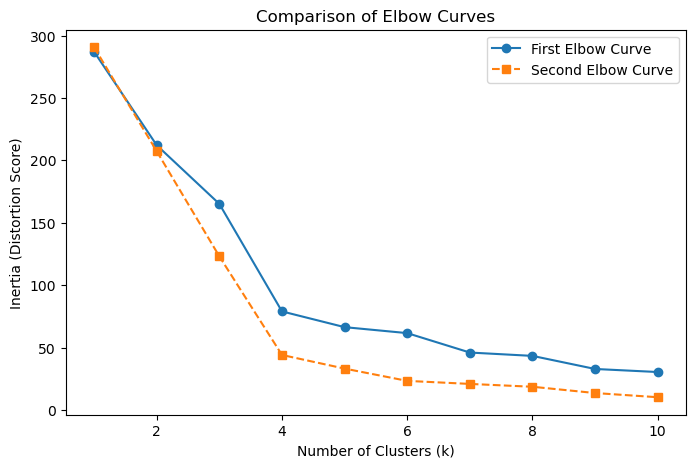

In [30]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!


# Composite plot to contrast the Elbow curves
plt.figure(figsize=(8, 5))

# Plot first elbow curve
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o", linestyle="-", label="First Elbow Curve")

# Plot second elbow curve
plt.plot(second_elbod_df["k"], second_elbod_df["inertia"], marker="s", linestyle="--", label="Second Elbow Curve")

# Labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Distortion Score)")
plt.title("Comparison of Elbow Curves")
plt.legend()

# Show plot
plt.show()


In [38]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
(scaled_market_data_predictions.hvplot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", by="market_clusters", hover_cols="coin_id", title="Original Scaled Data Plot") + df_market_pca_prediction_4.hvplot.scatter(x="PCA_1", y="PCA_2", by="hover_cols", hover_cols="coin_id", title="PCA Data Plot"))


:Layout
   .NdOverlay.I  :NdOverlay   [market_clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [hover_cols]
      :Scatter   [PCA_1]   (PCA_2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The impact of using PCA data resulted in tighter clusters, it also resulted in more entries within cluster 0 and cluster 1 than the original analysis did.